In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/drug+review+dataset+drugs+com/drugsComTrain_raw.tsv", sep="\t")

In [ ]:
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10.0,"May 31, 2015",125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1.0,"November 1, 2011",34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2.0,"March 15, 2014",35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10.0,"September 19, 2015",79


In [ ]:
data['review'][1220], data['condition'][1220]

('"My son was just diagnosed adhd today. He&#039;s 5 and in kindergarten, and his problems are enough that his school almost kicked him out! He will be starting his medicine and working up to the 1mg dose after the week. I&#039;m really excited, and hoping to see some lasting changes. If not his dr and I have already discussed uping the dosage, or switching him to stimulates. Hopefully I will be posting again soon. Also if it helps anyone at all, my son is covered under state insurance, and I had to pay no out of pocket expense for his medication."',
 'ADHD')

In [ ]:
data.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


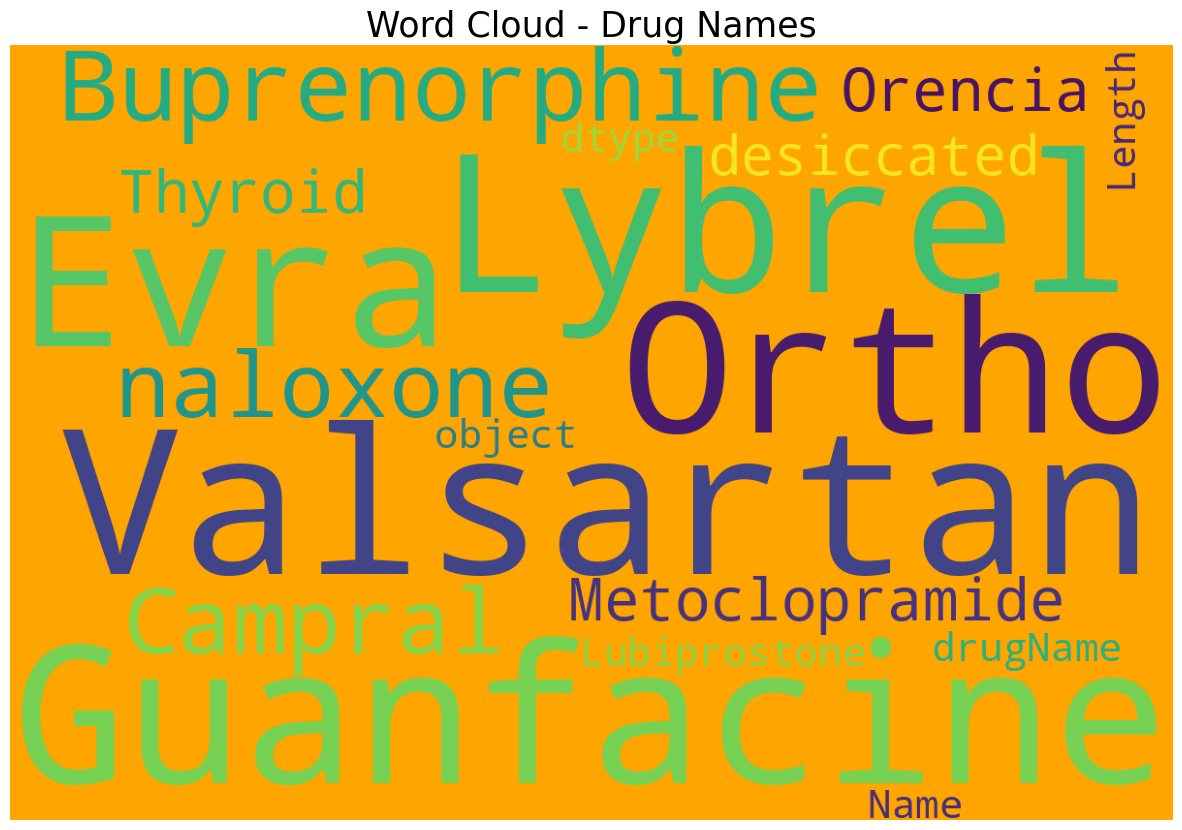

In [ ]:
# let's see the words cloud for the reviews
# most popular drugs
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
AMENITIES = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

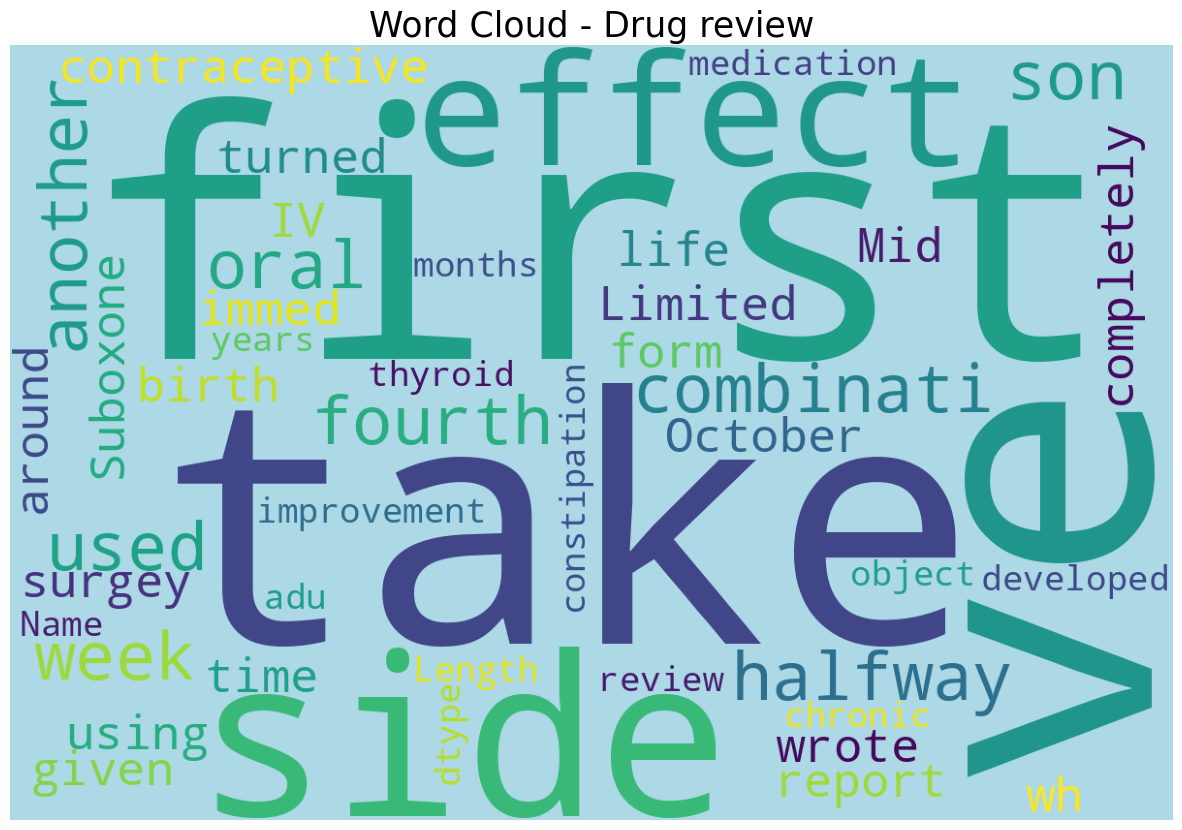

In [ ]:
# let's see the words cloud for the reviews
# most popular drugs
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug review', fontsize = 25)
print(wordcloud)
AMENITIES = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.axis('off')
plt.imshow(wordcloud)

##Barplot for top 20 drugs

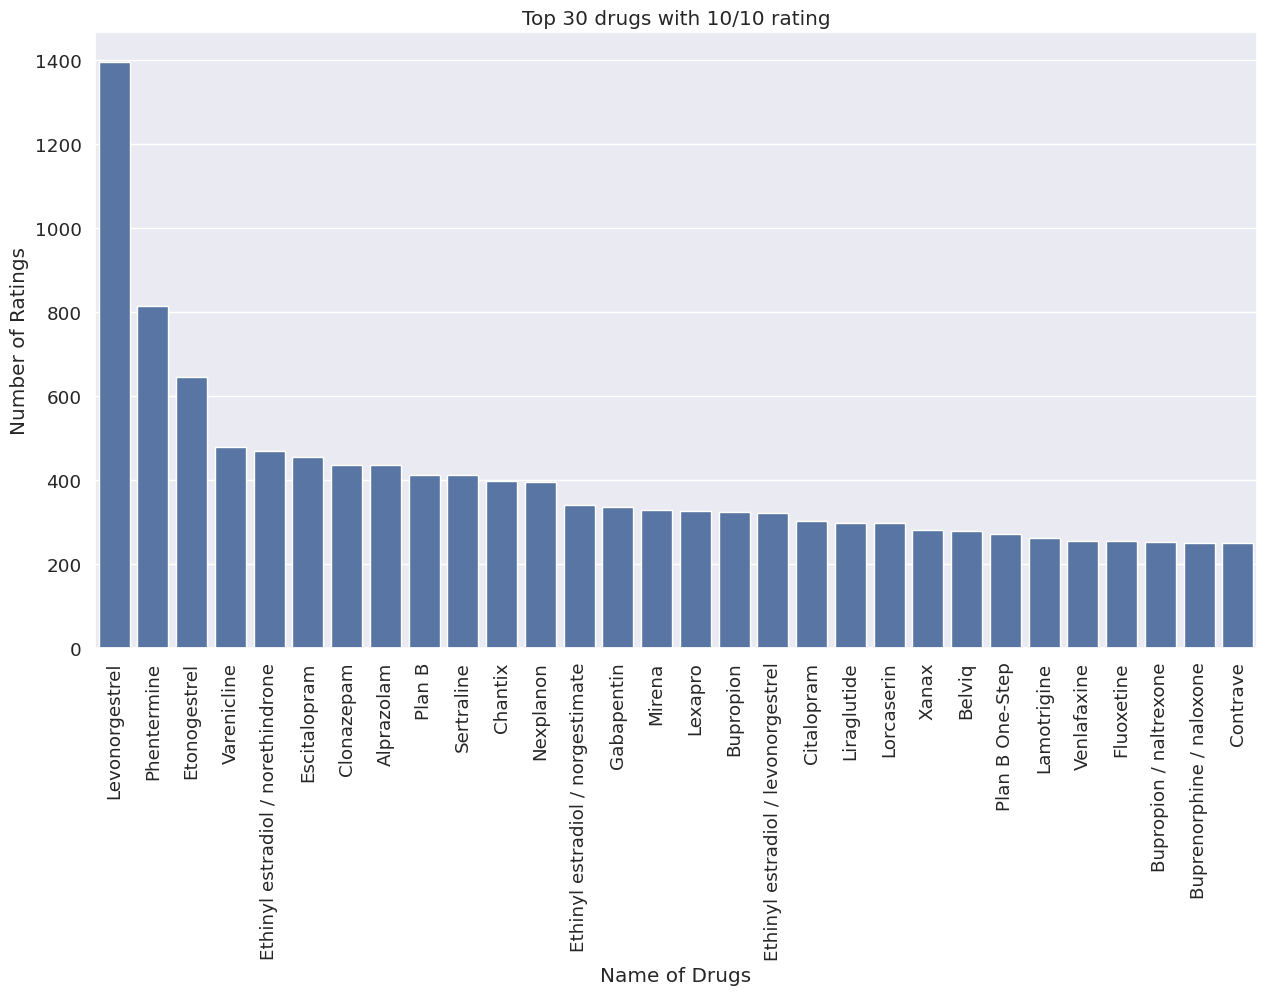

In [ ]:
sns.set(font_scale = 1.2, style='darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())
# rating[0], drugname[0], drug_rating[0]

drugname, drug_rating
sns_rating = sns.barplot(x=drugname[0:30], y=drug_rating[0:30])

sns_rating.set_title('Top 30 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Name of Drugs")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

#Drugs with 1/10 rating

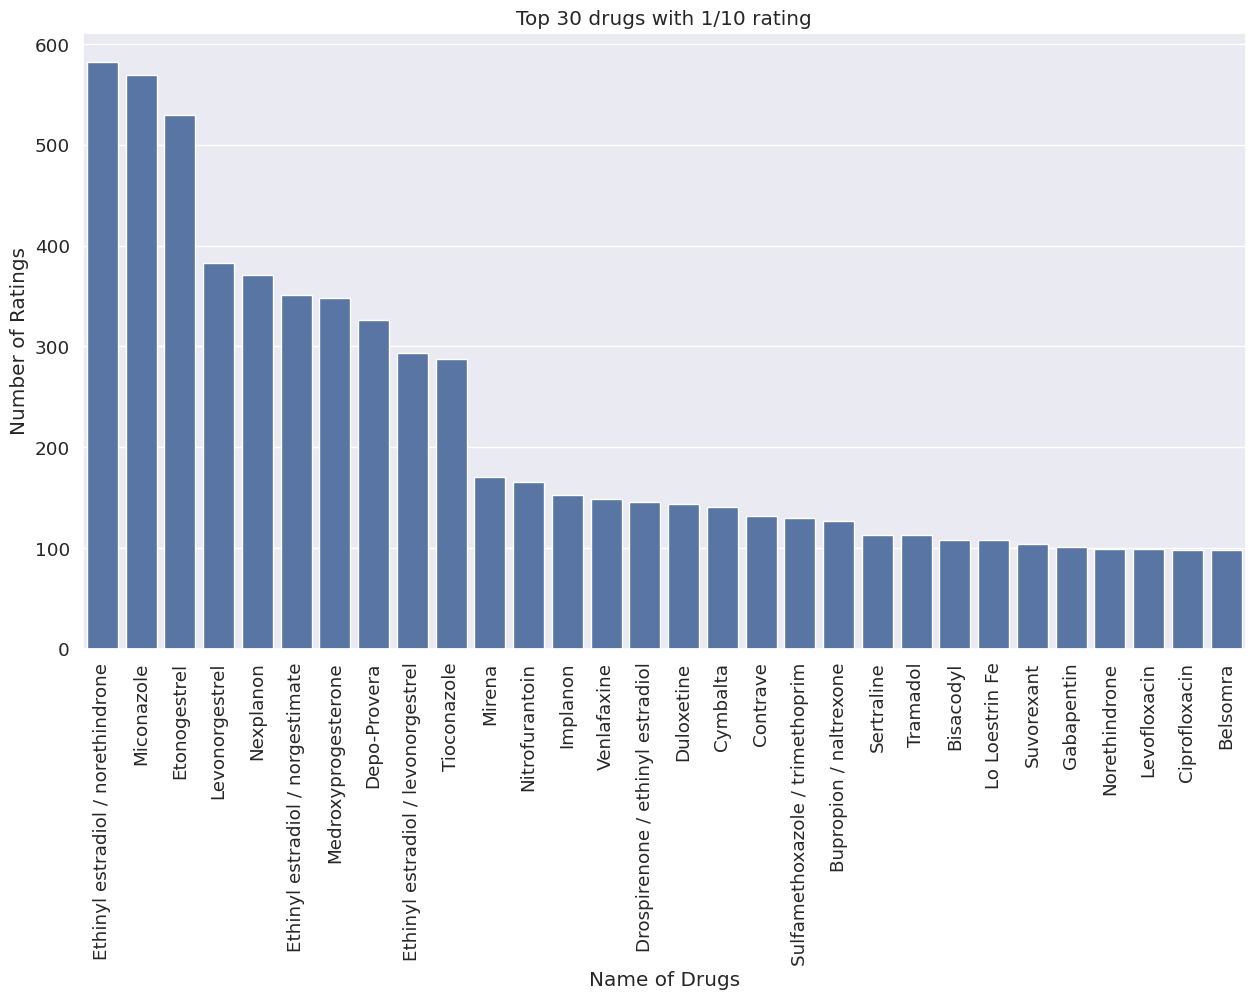

In [ ]:
sns.set(font_scale = 1.2, style='darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())
# rating[0], drugname[0], drug_rating[0]

drugname, drug_rating
sns_rating = sns.barplot(x=drugname[0:30], y=drug_rating[0:30])

sns_rating.set_title('Top 30 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Name of Drugs")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

#Presenting each percentage of rating with a Pie Chart

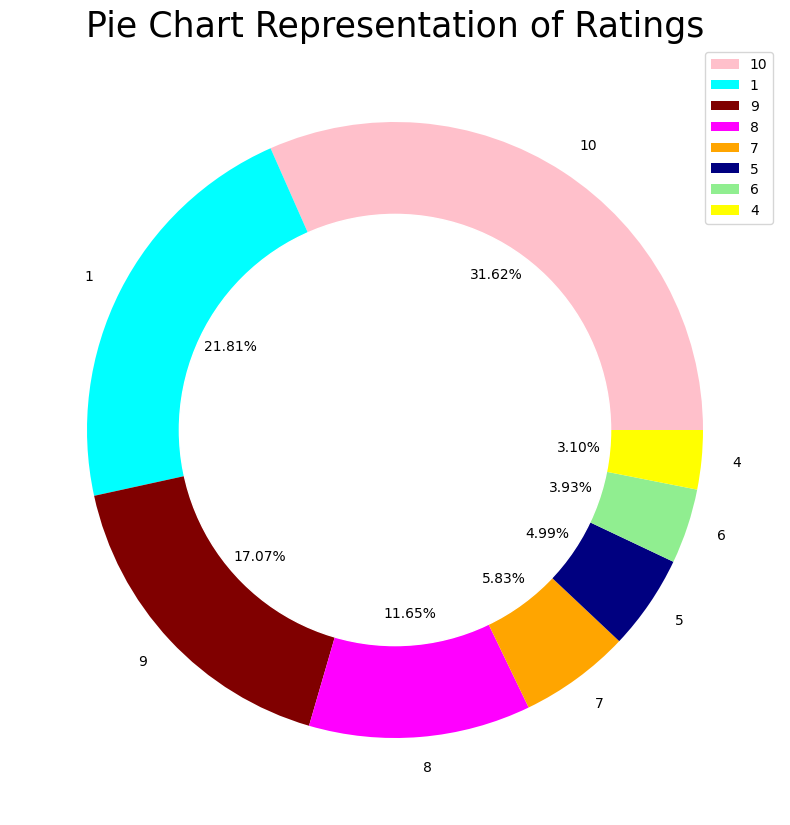

In [ ]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]

colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
data['rating'] = data['rating'].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


<ipython-input-6-7687db2b1b14>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_1 = sns.countplot(data, x="rating",palette='spring',ax=ax[0],order=list(range(10,0,-1)))


Text(0.5, 0, 'Rating')

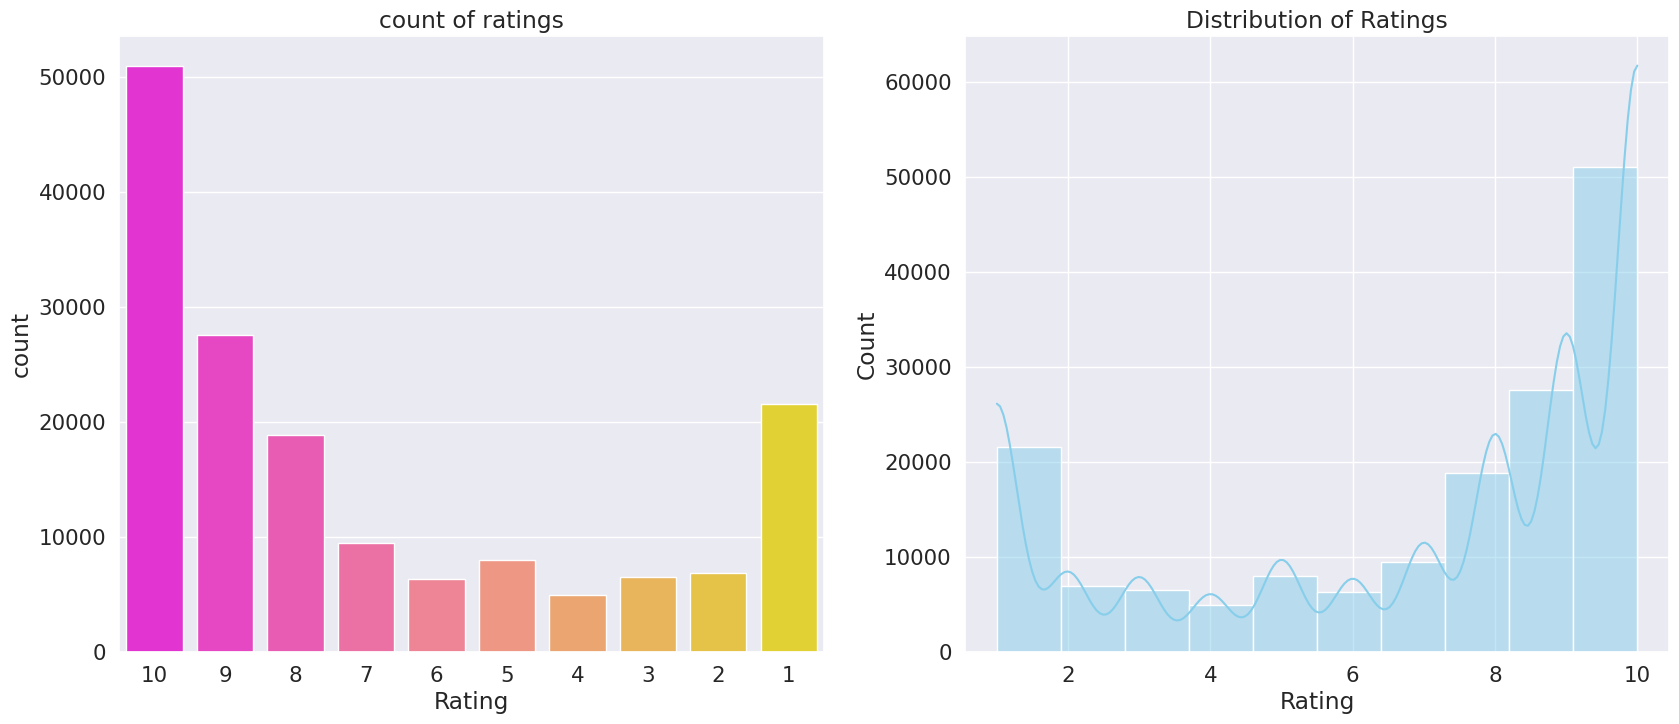

In [ ]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale=1.4, style='darkgrid')
fig, ax = plt.subplots(1,2)

sns_1 = sns.countplot(data, x="rating",palette='spring',ax=ax[0],order=list(range(10,0,-1)))
sns_1.set_title('count of ratings')
sns_1. set_xlabel("Rating")

# Create a histogram with KDE on the second subplot
# Since 'sns.distplot' is deprecated, using 'sns.histplot' with KDE
sns_2 = sns.histplot(data['rating'], bins=10, kde=True, color="skyblue", ax=ax[1])
sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

# Display the plot
# plt.show()


#top conditions through which people are suffering

In [ ]:
cond = dict(data['condition'])


In [ ]:
sns.set(font_scale = 1.2, style='darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

cond = dict(data["condition"].value_counts())


In [ ]:
bc_types = data[data['condition'] == "Birth Control"]["drugName"].value_counts()[0:10]
sns.set(font_scale = 1.2, style='darkgrid')
plt.rcParams['figure.figsize'] = [15,8]

sns_ = sns.barplot(x=bc_types.index, y = bc_types.values, palette = 'summer')
# sns_ = sns.barplot(x = bc_types.index)
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for birth control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

In [ ]:
# bc_types.values

#Setting Sentiment Threshold


In [ ]:
data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    121222
0.0     40075
Name: count, dtype: int64

In [ ]:
size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentinment", "Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, colors = colors, labels=labels, explode=explode, autopct= '%.2f%%')
plt.axis('off')
plt.title('Pie chart respresentation of Sentiments', fontsize=25)
plt.legend()
plt.show()

In [ ]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# making Words cloud for the postive sentiments
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
data

In [ ]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [ ]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

In [ ]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

In [ ]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

## Pre Processing

In [ ]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

In [ ]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
# Removing the stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['review_clean'] = review_clean(data['review'])
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [ ]:
data['review_clean']

0         "it side effect, take combination bystolic 5 m...
1         "my son halfway fourth week intuniv. became co...
2         "i used take another oral contraceptive, 21 pi...
3         "this first time using form birth control. im ...
4         "suboxone completely turned life around. feel ...
                                ...                        
161292    "i wrote first report mid-october 2014. alcoho...
161293    "i given iv surgey. immediately became anxious...
161294    "limited improvement 4 months, developed bad r...
161295    "ive thyroid medication 49 years, spent first ...
161296    "ive chronic constipation adult life. tried li...
Name: review_clean, Length: 161297, dtype: object

In [ ]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [ ]:
data.head(3)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,"""it side effect, take combin bystol 5 mg fish ..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,"""mi son halfway fourth week intuniv. becam con..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,"""i use take anoth oral contraceptive, 21 pill ..."


In [ ]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [ ]:
data['sentiment'] = sentiment(data['review'])

In [ ]:
# data['sentiment_clean'] = sentiment(data['review_clean'])

In [ ]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [ ]:
data['sentiment_clean_ss']

0         0.000000
1         0.168333
2         0.067210
3         0.179545
4         0.194444
            ...   
161292    0.262917
161293   -0.276389
161294   -0.223810
161295    0.212597
161296    0.085417
Name: sentiment_clean_ss, Length: 161297, dtype: float64

In [ ]:
data = data.dropna(how="any", axis=0)

In [ ]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

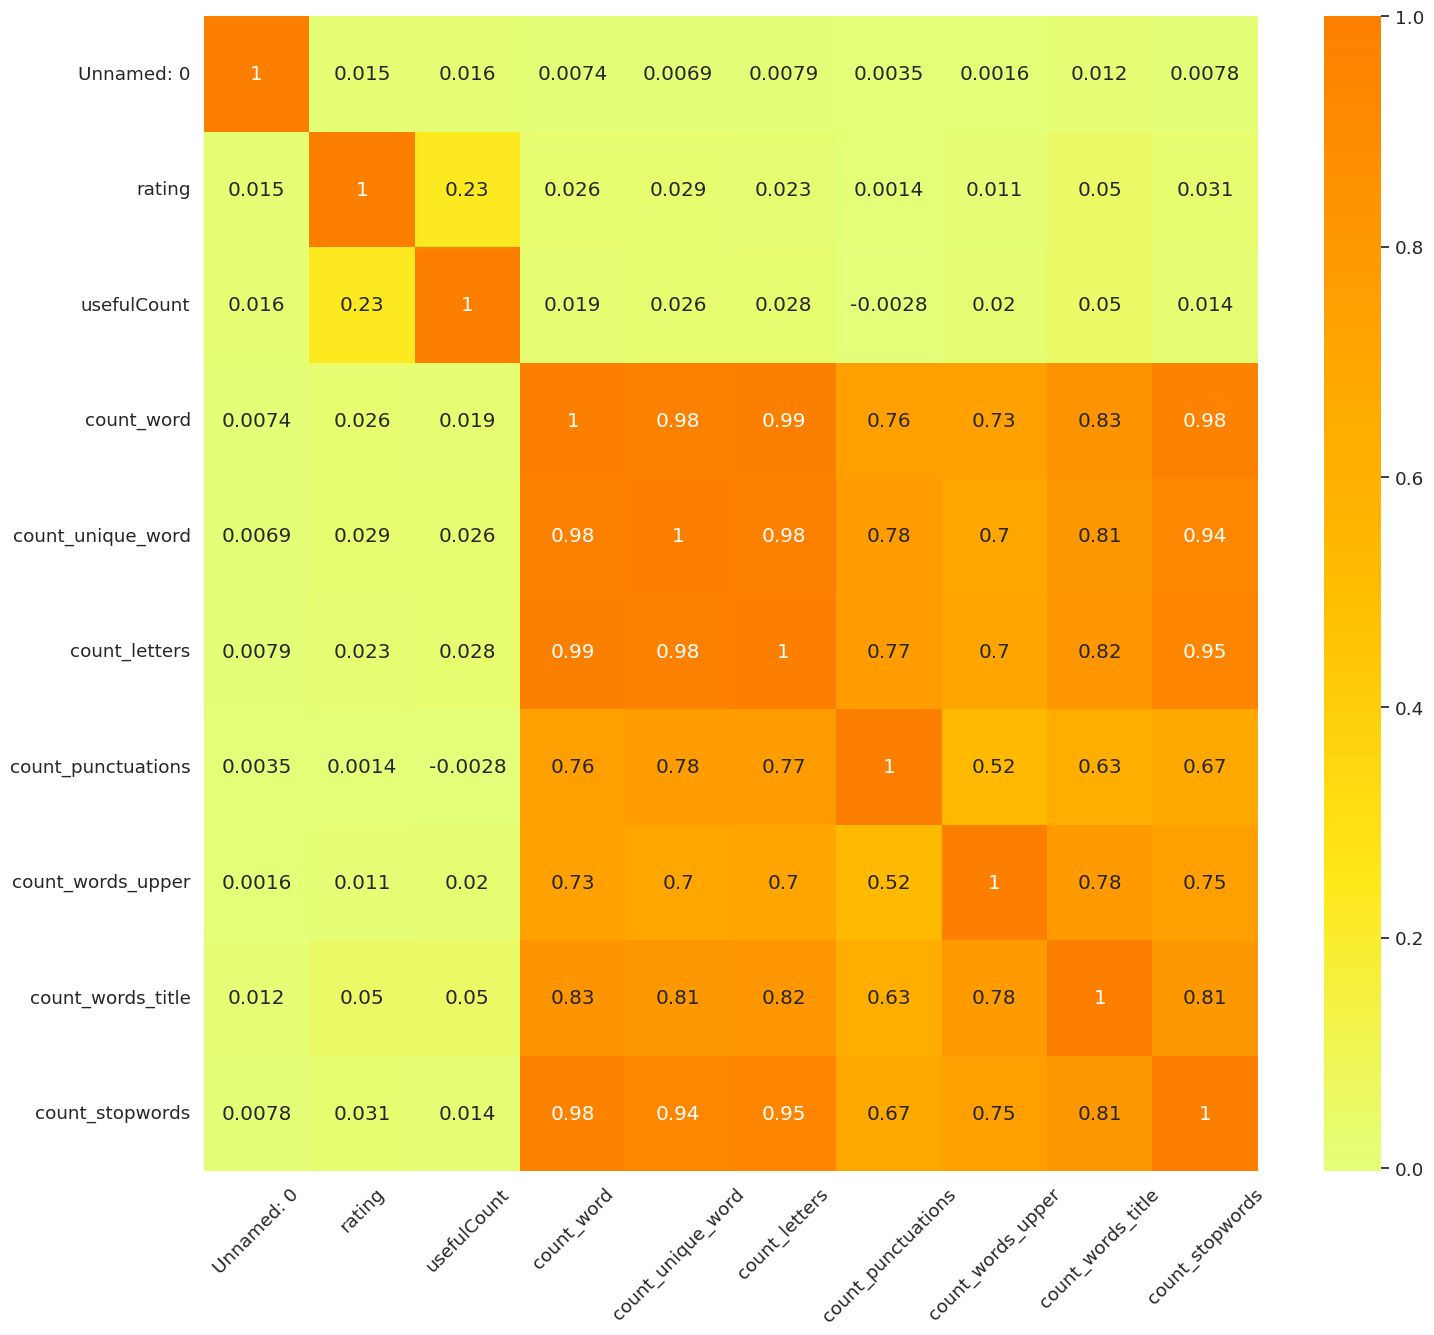

In [ ]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [ ]:
# # Label Encoding Drugname and Conditions
# from sklearn.preprocessing import LabelEncoder
# label_encoder_feat = {}
# for feature in ['drugName', 'condition']:
#     label_encoder_feat[feature] = LabelEncoder()
#     data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [ ]:
# data[feature]

0         466
1          73
2         165
3         165
4         574
         ... 
161292     92
161293    534
161294    701
161295    812
161296    233
Name: condition, Length: 160398, dtype: int64

In [ ]:
data.sample(1)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
123890,131904,1065,262,"""I am a 23 year old male suffering from extrem...",10,2013-08-19,73,1.0,2013,8,...,"""i am a 23 year old male suffering from extrem...",0.283333,65,52,346,11,7,12,28,4.338462


In [ ]:
# features = data[['condition', 'usefulCount', 'day', 'month', 'Year',
#                    'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
#                    'count_punctuations', 'count_words_upper', 'count_words_title',
#                    'count_stopwords', 'mean_word_len']]

# y = data['Review_Sentiment']

In [ ]:
# features.sample(1)
# y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
161292    1.0
161293    0.0
161294    0.0
161295    1.0
161296    1.0
Name: Review_Sentiment, Length: 160398, dtype: float64

## A new column has been made!

In [ ]:
data['drug_condition_review'] = data['drugName'] + ' ' + data['condition'] + ' ' +  data['review_clean_ss']

In [ ]:
data.sample(1)
# features.info()
# features.sample(1)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean,review_clean_ss,drug_condition_review
67647,166194,Levonorgestrel,Emergency Contraception,"""I was switching from pill to patch, and our n...",1,2016-12-29,8,0.0,2016,12,29,"""i switch pill patch, nurs practition want wai...","""i was switching from pill to patch, and our n...","Levonorgestrel Emergency Contraception ""i was ..."


In [ ]:
# data['review_clean_ss']

0         "it has no side effect, i take it in combinati...
1         "my son is halfway through his fourth week of ...
2         "i used to take another oral contraceptive, wh...
3         "this is my first time using any form of birth...
4         "suboxone has completely turned my life around...
                                ...                        
161292    "i wrote my first report in mid-october of 201...
161293    "i was given this in iv before surgey. i immed...
161294    "limited improvement after 4 months, developed...
161295    "ive been on thyroid medication 49 years, i sp...
161296    "ive had chronic constipation all my adult lif...
Name: review_clean_ss, Length: 160398, dtype: object

In [ ]:
# data['drug_condition_review']

0         Valsartan Left Ventricular Dysfunction "it has...
1         Guanfacine ADHD "my son is halfway through his...
2         Lybrel Birth Control "i used to take another o...
3         Ortho Evra Birth Control "this is my first tim...
4         Buprenorphine / naloxone Opiate Dependence "su...
                                ...                        
161292    Campral Alcohol Dependence "i wrote my first r...
161293    Metoclopramide Nausea/Vomiting "i was given th...
161294    Orencia Rheumatoid Arthritis "limited improvem...
161295    Thyroid desiccated Underactive Thyroid "ive be...
161296    Lubiprostone Constipation, Chronic "ive had ch...
Name: drug_condition_review, Length: 160398, dtype: object

In [ ]:
# features.sample(1)

,condition,usefulCount,sentiment,day,month,Year,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
130962,386,47,-0.065556,5,1,2012,-0.065556,64,60,323,12,2,7,30,4.015625


In [ ]:
features

#SAVE PREPROCESSED DATASET

In [ ]:
data.to_csv('/content/drive/MyDrive/drug+review+dataset+drugs+com/preprocessed_data.csv')

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/drug+review+dataset+drugs+com/preprocessed_data.csv')

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'drugName', 'condition', 'review',
       'rating', 'date', 'usefulCount', 'Review_Sentiment', 'Year', 'month',
       'day', 'review_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len', 'drug_condition_review'],
      dtype='object')

In [ ]:
# del data

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,...,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,drug_condition_review
0,0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,...,0.000000,17,17,79,3,1,6,7,3.705882,"Valsartan Left Ventricular Dysfunction ""it has..."
1,1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,...,0.168333,141,106,741,23,2,13,69,4.248227,"Guanfacine ADHD ""my son is halfway through his..."
2,2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,...,0.067210,134,95,743,34,6,15,59,4.544776,"Lybrel Birth Control ""i used to take another o..."
3,3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,...,0.179545,89,57,442,15,4,9,45,3.977528,"Ortho Evra Birth Control ""this is my first tim..."
4,4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,...,0.194444,124,86,695,28,7,15,60,4.532258,"Buprenorphine / naloxone Opiate Dependence ""su..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160393,161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125,1.0,2015,...,0.262917,127,85,689,22,9,14,64,4.377953,"Campral Alcohol Dependence ""i wrote my first r..."
160394,161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34,0.0,2011,...,-0.276389,50,42,262,12,5,7,23,4.260000,"Metoclopramide Nausea/Vomiting ""i was given th..."
160395,161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35,0.0,2014,...,-0.223810,14,14,95,4,1,1,3,5.857143,"Orencia Rheumatoid Arthritis ""limited improvem..."
160396,161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79,1.0,2015,...,0.212597,136,97,748,34,7,20,59,4.485294,"Thyroid desiccated Underactive Thyroid ""ive be..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
X = vectorizer.fit_transform(data['drug_condition_review'])


# vectorizer = TfidfVectorizer(
#         sublinear_tf=True, stop_words="english"
#     )
# from dask.dataframe import from_pandas
# features = from_pandas(features, npartitions=5)
# features['drug_condition_review'] = list(vectorizer.fit_transform(data['drug_condition_review']).toarray())

In [ ]:
target = data['Review_Sentiment']

In [ ]:
data['drug_condition_review'].values

In [ ]:
data['drug_condition_review'].values.reshape(-1,1)

array([['Valsartan Left Ventricular Dysfunction "it has no side effect, i take it in combination of bystolic 5 mg and fish oil"'],
       ['Guanfacine ADHD "my son is halfway through his fourth week of intuniv. we became concerned when he began this last week, when he started taking the highest dose he will be on. for two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) i called his doctor on monday morning and she said to stick it out a few days. see how he did at school, and with getting up in the morning. the last two days have been problem free. he is much more agreeable than ever. he is less emotional (a good thing), less cranky. he is remembering all the things he should. overall his behavior is better. \r\nwe have tried many different medications and so far this is the most effective."'],
       ['Lybrel Birth Control "i used to take another oral contraceptive, which had 21 pill cycle

In [ ]:


# x = data['drug_condition_review'].values.reshape(-1,1)
# Y = data['Review_Sentiment'].values
# TfIdf = TfidfVectorizer(norm='l1',ngram_range=(1,1),stop_words='english',strip_accents='ascii',analyzer='word')

In [ ]:
# features['drug_condition_review'] = list(vectorizer.fit_transform(data['drug_condition_review']).toarray())
# XX = TfIdf.fit_transform(x.ravel()) # ravel is to
#pickle.dump(tfmodel, open('TFIDF.pkl', 'wb'))
# XX = tfmodel.transform(x.ravel())

In [ ]:
# s = data['Review_Sentiment'].tolist()
# from collections import Counter
# print(Counter(s).keys())
# print(Counter(s).values())

dict_keys([1.0, 0.0])
dict_values([120570, 39828])


In [ ]:
# XX[0][0]

<1x2472 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
# features.sample(1)

,condition,usefulCount,day,month,Year,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
21738,231,10,12,5,2017,-0.04375,153,103,737,19,13,11,81,3.816993


In [ ]:
# input_dim
# target

#TRAINING MODELS

In [ ]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (112278, 19670)
The Test set size  (48120, 19670)


In [ ]:
from sklearn.tree import DecisionTreeClassifier# from tree import estimators_
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
clf = DecisionTreeClassifier(max_depth=1000, criterion='gini', random_state=0)
clf = clf.fit(X_train, y_train)

In [ ]:
# Predictions
predictions = clf.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.835453034081463
The confusion Matrix is 


array([[ 7813,  4035],
       [ 3883, 32389]])

In [ ]:
# Click to show 5 definitions.

# The Accuracy of the model is :  0.8206982543640898
# The confusion Matrix is

# array([[ 7832,  4016],
#        [ 4612, 31660]])

###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Predictions
predictions = forest.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.880860349127182
The confusion Matrix is 


array([[ 6510,  5338],
       [  395, 35877]])

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.146 seconds


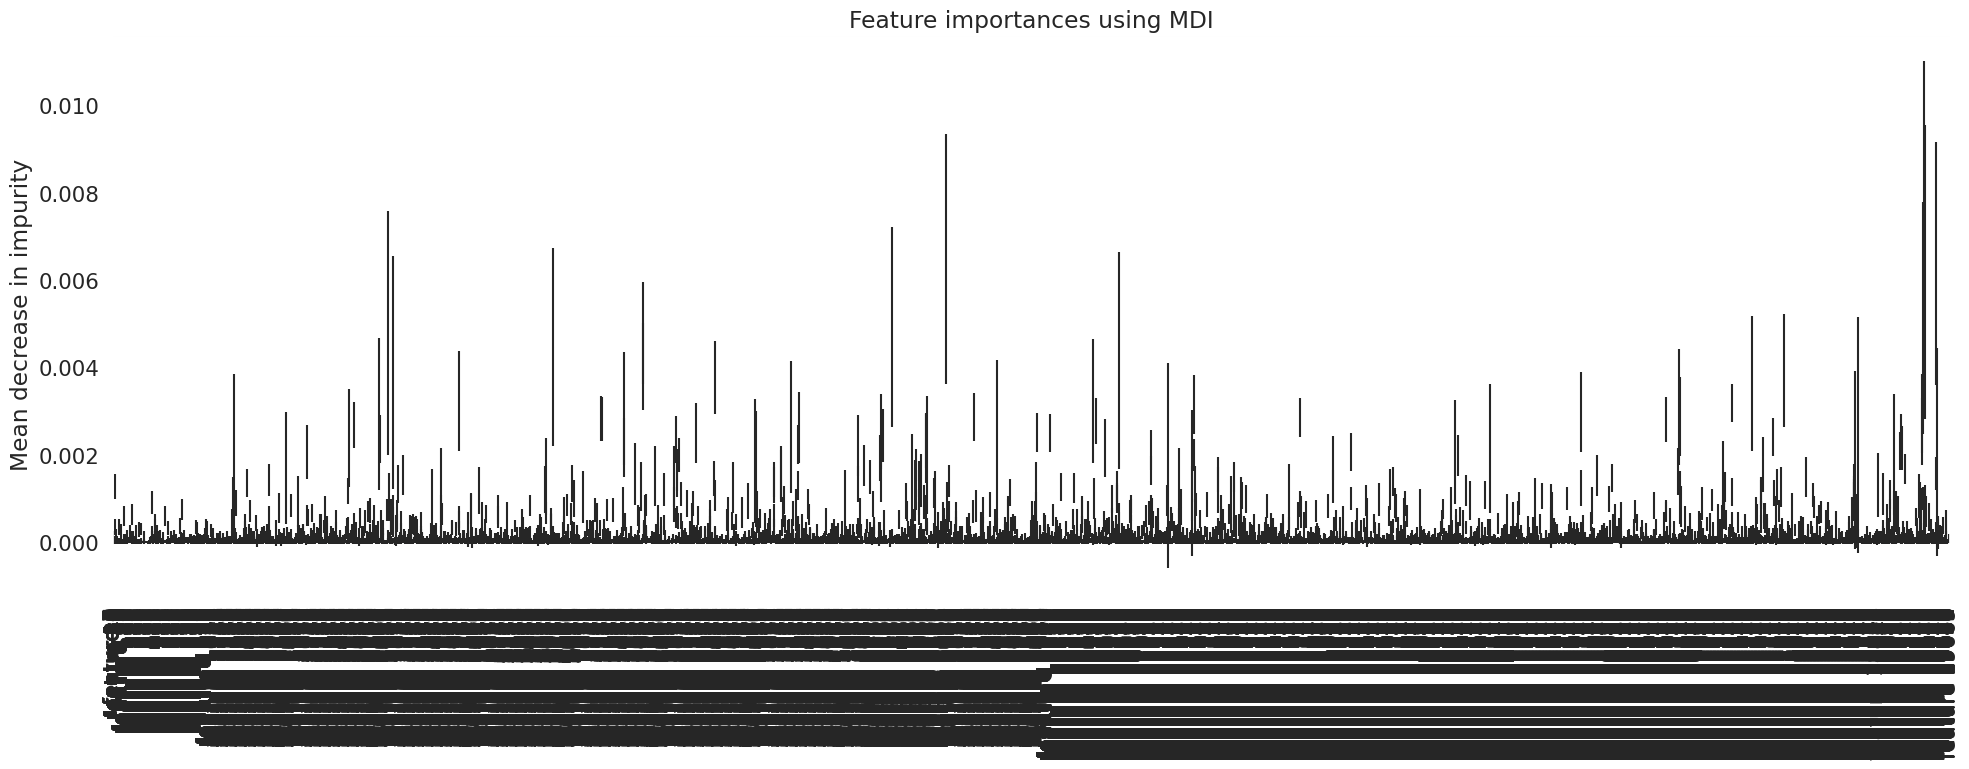

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8541562759767248


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split

###**Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print(f"Number of support vectors: {len(svm.support_vectors_)}")

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

In [ ]:
y_score = svm.decision_function(X_test)  # Get decision function for ROC curve

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print(f'F1 Score: {f1}')

# Calculate ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')


In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



<Axes: xlabel='sentiment', ylabel='sentiment_clean_ss'>

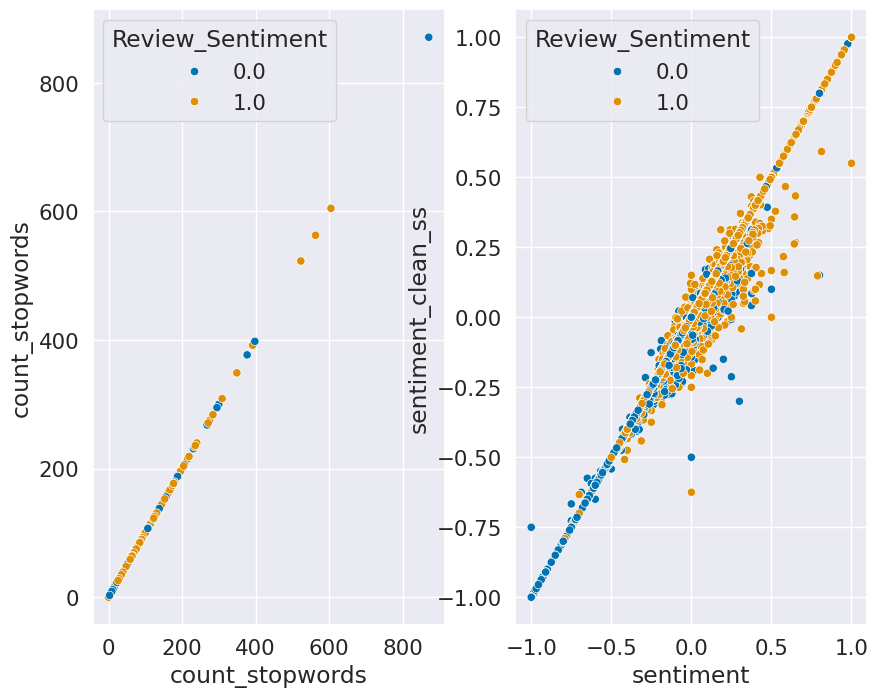

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,8]
sns.set(font_scale=1.4, style='darkgrid')
fig, ax = plt.subplots(1,2)

sns.scatterplot(data=data, x='count_stopwords', y='count_stopwords', hue='Review_Sentiment',palette ='colorblind',ax=ax[0])
sns.scatterplot(data=data, x='sentiment', y='sentiment_clean_ss', hue='Review_Sentiment',palette ='colorblind',ax=ax[1])
# sentiment_clean_ss

**#LGBM Classifier**


In [ ]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8717996674979218
The confusion Matrix is 


array([[ 7648,  4200],
       [ 1969, 34303]])

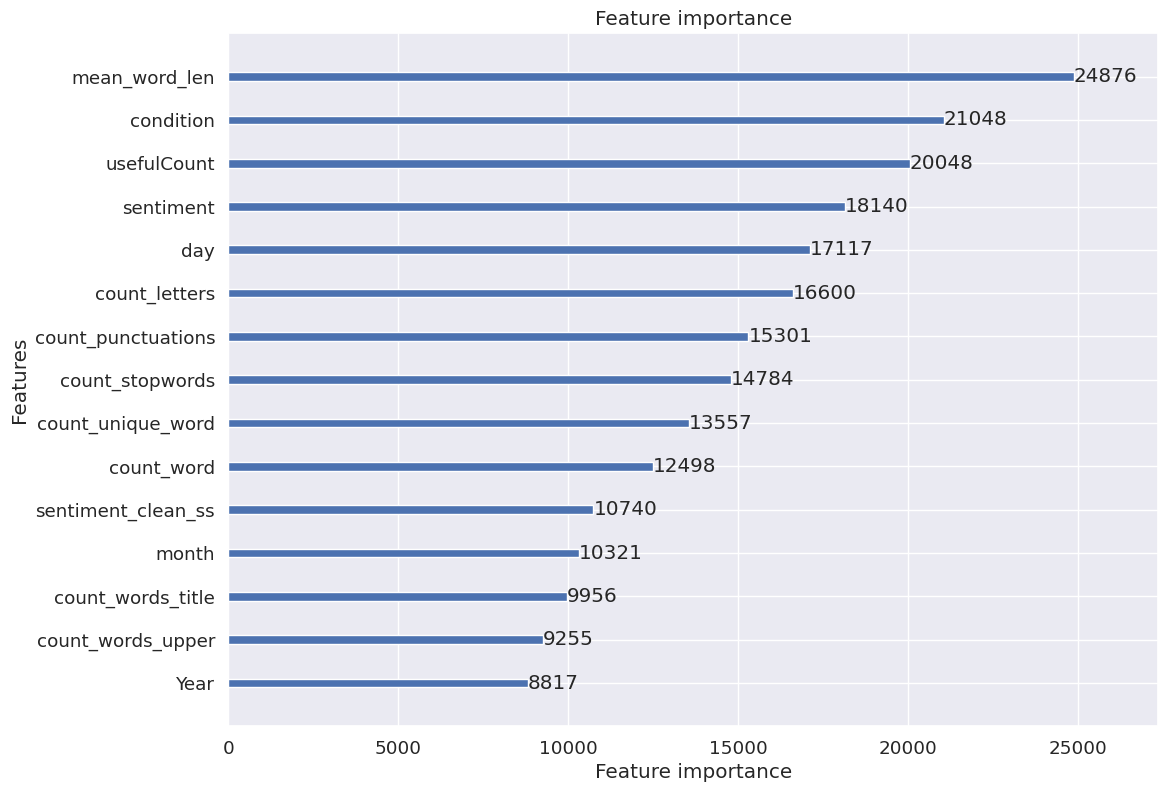

In [ ]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

In [ ]:
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'Review_Sentiment', 'Year', 'month', 'day', 'review_clean',
       'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

In [ ]:
data["month"]

0          5
1          4
2         12
3         11
4         11
          ..
161292     5
161293    11
161294     3
161295     9
161296    12
Name: month, Length: 160398, dtype: int32

In [ ]:


data.sample(1)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
123552,176547,1816,441,"""For when my mind won&#039;t shut off at night...",10,2012-07-12,103,1.0,2012,7,...,"""for when my mind wont shut off at night, no m...",-0.072222,85,68,432,23,5,7,44,4.094118


In [ ]:
data['review'][0]


'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [ ]:
target



0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
161292    1.0
161293    0.0
161294    0.0
161295    1.0
161296    1.0
Name: Review_Sentiment, Length: 160398, dtype: float64

In [ ]:
features

,condition,usefulCount,sentiment,day,month,Year,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,Left Ventricular Dysfunction,27,0.000000,20,5,2012,0.000000,17,17,79,3,1,6,7,3.705882
1,ADHD,192,0.168333,27,4,2010,0.168333,141,106,741,23,2,13,69,4.248227
2,Birth Control,17,0.067210,14,12,2009,0.067210,134,95,743,34,6,15,59,4.544776
3,Birth Control,10,0.179545,3,11,2015,0.179545,89,57,442,15,4,9,45,3.977528
4,Opiate Dependence,37,0.194444,27,11,2016,0.194444,124,86,695,28,7,15,60,4.532258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161292,Alcohol Dependence,125,0.262917,31,5,2015,0.262917,127,85,689,22,9,14,64,4.377953
161293,Nausea/Vomiting,34,-0.276389,1,11,2011,-0.276389,50,42,262,12,5,7,23,4.260000
161294,Rheumatoid Arthritis,35,-0.223810,15,3,2014,-0.223810,14,14,95,4,1,1,3,5.857143
161295,Underactive Thyroid,79,0.212597,19,9,2015,0.212597,136,97,748,34,7,20,59,4.485294


###**Neural Networks with PyTorch**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Defining Features and splitting the data as train and test set
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/drug+review+dataset+drugs+com/preprocessed_data.csv')

In [ ]:
import re
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
class Vectorizer():
    def __init__(self,clean_pattern=None,max_features=None,stop_words=None):
        self.clean_pattern = clean_pattern
        self.max_features = max_features
        self.stopwords = stop_words
        self.tfidf = TfidfVectorizer(stop_words=self.stopwords,max_features=self.max_features)
        self.builded = False


    def _clean_texts(self,texts):

        cleaned = []
        for text in texts:
            if self.clean_pattern is not None:
                text = re.sub(self.clean_pattern," ",text)

            text = text.lower().strip()
            cleaned.append(text)

        return cleaned


    def _set_tfidf(self,cleaned_texts):
        self.tfidf.fit(cleaned_texts)

    def build_vectorizer(self,texts):
        cleaned_texts = self._clean_texts(texts)
        self._set_tfidf(cleaned_texts)
        self.builded = True

    def vectorizeTexts(self,texts):
        if self.builded:
            cleaned_texts = self._clean_texts(texts)
            return self.tfidf.transform(cleaned_texts)

        else:
            raise Exception("Vectorizer is not builded.")


In [ ]:
class TweetDataset(Dataset):

    def __init__(self,x_vectorized,y_encoded):
        self.x_vectorized = x_vectorized
        self.y_encoded = y_encoded


    def __len__(self):
        return len(self.x_vectorized)


    def __getitem__(self,index):
        return self.x_vectorized[index],self.y_encoded[index]

In [ ]:
X = data['drug_condition_review']
target = data['Review_Sentiment']

In [ ]:
x = list(data["drug_condition_review"])

In [ ]:
vectorizer = Vectorizer("[^a-zA-Z0-9]",max_features=7000,stop_words="english");

In [ ]:
vectorizer.build_vectorizer(x)

In [ ]:
vectorized_x =vectorizer.vectorizeTexts(x).toarray()

In [ ]:
type(vectorized_x)

numpy.ndarray

In [ ]:
type(target)
target.info()
y = list(data["Review_Sentiment"])

<class 'pandas.core.series.Series'>
RangeIndex: 160398 entries, 0 to 160397
Series name: Review_Sentiment
Non-Null Count   Dtype  
--------------   -----  
160398 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [ ]:
data['Review_Sentiment'][0]

1.0

In [ ]:
label_map = {
    "positive":0,
    "negative":1
}

In [ ]:
y_encoded = []
y_encoded = np.asarray(y)


In [ ]:
vectorized_x.shape

(160398, 7000)

In [ ]:
dataset = TweetDataset(vectorized_x,y_encoded)
print("Length of our dataset is",len(dataset))

print(dataset[2])

Length of our dataset is 160398
(array([0., 0., 0., ..., 0., 0., 0.]), 1.0)


In [ ]:
train_indices,test_indices = train_test_split(list(range(0,len(dataset))),test_size=0.25,random_state=42)


In [ ]:
print(len(dataset))
# print(len(test_indices))
# type(train_indices)
print(dataset.x_vectorized.shape)

160398
(160398, 7000)


In [ ]:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)


In [ ]:


BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                                sampler=test_sampler)



In [ ]:
# device = torch.device("cuda")
# device


In [ ]:
model = DenseNetwork()

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.RMSprop(model.parameters(),lr=1e-3)

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class DenseNetwork(nn.Module):
    def __init__(self):
        super(DenseNetwork, self).__init__()
        self.fc1 = nn.Linear(7000, 1024)
        self.drop1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(1024, 256)
        self.drop2 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(256, 128)
        self.drop3 = nn.Dropout(0.4)
        self.prediction = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.relu(self.fc3(x))
        x = self.drop3(x)
        x = self.prediction(x)  # Output layer directly connects to loss
        return x

model = DenseNetwork()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.RMSprop(model.parameters(), lr=1e-3)


Epoch 1/2 finished: train_loss = 343.92, train_accuracy = 83.91%
Epoch 2/2 finished: train_loss = 261.41, train_accuracy = 88.60%


In [ ]:
EPOCHS = 10
TRAIN_LOSSES = []
TRAIN_ACCURACIES = []
TRAIN_F1_SCORES = []  # Store F1 scores for each epoch

for epoch in range(1, EPOCHS + 1):
    epoch_loss = 0.0
    correct_predictions = 0
    epoch_total = 0

    # Reset these counts every epoch
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for data_, target_ in train_loader:
        data_ = data_.float()
        target_ = target_.float().unsqueeze(1)  # Ensure target is correctly shaped

        optimizer.zero_grad()
        outputs = model(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        predictions = torch.sigmoid(outputs) > 0.5  # Apply threshold
        correct_predictions += (predictions == target_).sum().item()
        epoch_total += target_.size(0)

        # Update true/false positives/negatives
        true_positives += ((predictions == 1) & (target_ == 1)).sum().item()
        false_positives += ((predictions == 1) & (target_ == 0)).sum().item()
        false_negatives += ((predictions == 0) & (target_ == 1)).sum().item()

    # Calculate metrics for the current epoch
    accuracy = 100 * correct_predictions / epoch_total
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store the results for each epoch
    TRAIN_LOSSES.append(epoch_loss)
    TRAIN_ACCURACIES.append(accuracy)
    TRAIN_F1_SCORES.append(f1_score)

    # Print results after each epoch
    print(f"Epoch {epoch}/{EPOCHS} finished: train_loss = {epoch_loss:.2f}, train_accuracy = {accuracy:.2f}%, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1_score:.4f}")



Epoch 1/10 finished: train_loss = 4.07, train_accuracy = 99.89%, Precision = 0.9992, Recall = 0.9993, F1 Score = 0.9993
Epoch 2/10 finished: train_loss = 4.94, train_accuracy = 99.89%, Precision = 0.9991, Recall = 0.9994, F1 Score = 0.9992
Epoch 3/10 finished: train_loss = 3.42, train_accuracy = 99.92%, Precision = 0.9994, Recall = 0.9995, F1 Score = 0.9994
Epoch 4/10 finished: train_loss = 3.29, train_accuracy = 99.91%, Precision = 0.9993, Recall = 0.9995, F1 Score = 0.9994
Epoch 5/10 finished: train_loss = 3.21, train_accuracy = 99.91%, Precision = 0.9994, Recall = 0.9994, F1 Score = 0.9994
Epoch 6/10 finished: train_loss = 3.52, train_accuracy = 99.91%, Precision = 0.9993, Recall = 0.9995, F1 Score = 0.9994
Epoch 7/10 finished: train_loss = 3.34, train_accuracy = 99.92%, Precision = 0.9993, Recall = 0.9996, F1 Score = 0.9995
Epoch 8/10 finished: train_loss = 3.61, train_accuracy = 99.91%, Precision = 0.9993, Recall = 0.9996, F1 Score = 0.9994
Epoch 9/10 finished: train_loss = 3.88, 

In [ ]:
import torch
import numpy as np
from sklearn.metrics import roc_auc_score

test_true = 0
test_total = len(test_sampler)
test_loss = 0.0
true_positives = 0
false_positives = 0
false_negatives = 0
all_targets = []  # To store all target values
all_predictions = []  # To store all model predictions

with torch.no_grad():
    for data_, target_ in validation_loader:
        data_ = data_.float()
        target_ = target_.float().unsqueeze(1)

        outputs = model(data_)
        loss = criterion(outputs, target_)
        test_loss += loss.item()

        probabilities = torch.sigmoid(outputs)  # Get probabilities
        predictions = probabilities > 0.5  # Thresholding to get binary predictions
        test_true += (predictions == target_).sum().item()

        # Store probabilities and targets for AUC ROC calculation
        all_predictions.extend(probabilities.view(-1).cpu().numpy())
        all_targets.extend(target_.view(-1).cpu().numpy())

        # For F1 score
        true_positives += ((predictions == 1) & (target_ == 1)).sum().item()
        false_positives += ((predictions == 1) & (target_ == 0)).sum().item()
        false_negatives += ((predictions == 0) & (target_ == 1)).sum().item()

test_loss /= len(validation_loader)  # Average loss
accuracy = 100 * test_true / test_total

# Precision, recall, and F1 score
precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

# Calculate AUC ROC
auc_roc = roc_auc_score(all_targets, all_predictions)

print(f"Validation finished: Accuracy = {accuracy:.2f}%, Loss = {test_loss:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}, F1 Score = {f1_score:.4f}, AUC ROC = {auc_roc:.4f}")


Validation finished: Accuracy = 89.33%, Loss = 1.0144, Precision = 0.9363, Recall = 0.9212, F1 Score = 0.9287, AUC ROC = 0.9198


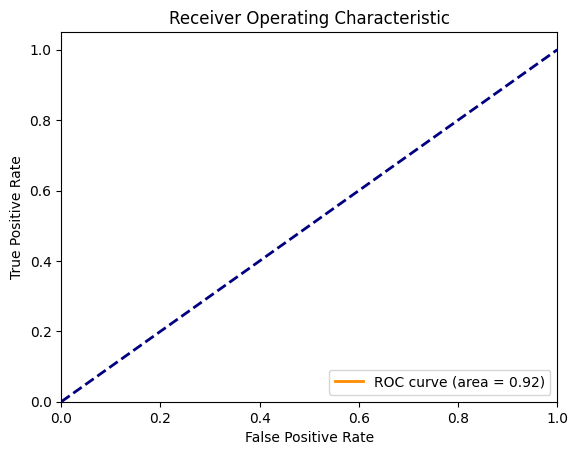

Validation finished: Accuracy = 89.33%, Loss = 1.0144, ROC-AUC = 0.92


In [ ]:

# Plotting ROC Curve
plt.figure()
lw = 2
plt.plot(false_positives, true_positives, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"Validation finished: Accuracy = {accuracy:.2f}%, Loss = {test_loss:.4f}, ROC-AUC = {auc_roc:.2f}")

In [ ]:
# Save the entire model
torch.save(model, '/content/drive/MyDrive/drug+review+dataset+drugs+com/DNN.pth')

# Load the entire model
loaded_model = torch.load('/content/drive/MyDrive/drug+review+dataset+drugs+com/DNN.pth')
loaded_model.eval()  # Set the model to evaluation mode


DenseNetwork(
  (fc1): Linear(in_features=7000, out_features=1024, bias=True)
  (drop1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (drop2): Dropout(p=0.4, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (drop3): Dropout(p=0.4, inplace=False)
  (prediction): Linear(in_features=128, out_features=1, bias=True)
)

#Long Short Term Memory Networks

In [ ]:
import os
import torch
import numpy as np

from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# Parameters for the model and training
feature_len = 1400
hidden_size = 128
num_layers = 4
num_classes = 1
num_epochs = 20
learning_rate = 1e-3


In [ ]:
# Initialize the model
model = LSTM(feature_len, hidden_size, num_classes, num_layers)
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
loss_func = nn.BCEWithLogitsLoss()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define the LSTM model class
class LSTM(nn.Module):
    def __init__(self, feature_len, hidden_size, num_classes, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(feature_len, hidden_size, num_layers, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, X):
        # Initial states
        h0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size)#.to(X.device)
        c0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size)#.to(X.device)
        # LSTM layer
        out, _ = self.lstm(X, (h0, c0))
        # Output layer
        out = self.output_layer(out[:, -1, :])  # Get the last time step's output
        return out

In [ ]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support


In [ ]:
def validate(model, validation_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for data, labels in validation_loader:
            data = data.float().reshape(-1, sequence_len, feature_len)
            labels = labels.float().unsqueeze(1)
            outputs = model(data)
            probabilities = torch.sigmoid(outputs)

            all_probs.extend(probabilities.view(-1).cpu().numpy())
            all_labels.extend(labels.view(-1).cpu().numpy())

     # Compute metrics
    auc_roc = roc_auc_score(all_labels, all_probs)
    precision, recall, f1_score, _ = precision_recall_fscore_support(
    all_labels, np.round(all_probs), average='binary')

    return all_labels, all_probs



In [ ]:
def train_and_validate(num_epochs, model, train_dataloader, validation_dataloader, loss_func, optimizer):
    for epoch in range(num_epochs):
        model.train()  # Ensure the model is in training mode
        for batch_idx, (data, labels) in enumerate(train_dataloader):
            data = data.float().reshape(-1, sequence_len, feature_len)  # Reshape data
            labels = labels.float().unsqueeze(1)  # Ensure labels are the correct shape

            output = model(data)
            loss = loss_func(output, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (batch_idx + 1) % 100 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_dataloader)}], Loss: {loss.item():.4f}")

        # Validate the model after each epoch
        validate(model, validation_dataloader, loss_func)

# Example usage
# Assuming 'train_loader' and 'validation_loader' are defined correctly elsewhere and are DataLoader objects
train_and_validate(num_epochs, model, train_loader, validation_loader, loss_func, optimizer)


Epoch [1/20], Step [100/940], Loss: 0.0004
Epoch [1/20], Step [200/940], Loss: 0.0002
Epoch [1/20], Step [300/940], Loss: 0.0009
Epoch [1/20], Step [400/940], Loss: 0.0001
Epoch [1/20], Step [500/940], Loss: 0.0008
Epoch [1/20], Step [600/940], Loss: 0.0001
Epoch [1/20], Step [700/940], Loss: 0.0031
Epoch [1/20], Step [800/940], Loss: 0.0003
Epoch [1/20], Step [900/940], Loss: 0.0025
Epoch [2/20], Step [100/940], Loss: 0.0003
Epoch [2/20], Step [200/940], Loss: 0.0007
Epoch [2/20], Step [300/940], Loss: 0.0048
Epoch [2/20], Step [400/940], Loss: 0.0017
Epoch [2/20], Step [500/940], Loss: 0.0093
Epoch [2/20], Step [600/940], Loss: 0.0004
Epoch [2/20], Step [700/940], Loss: 0.0005
Epoch [2/20], Step [800/940], Loss: 0.0380
Epoch [2/20], Step [900/940], Loss: 0.0002
Epoch [3/20], Step [100/940], Loss: 0.0000
Epoch [3/20], Step [200/940], Loss: 0.0112
Epoch [3/20], Step [300/940], Loss: 0.0002
Epoch [3/20], Step [400/940], Loss: 0.0450
Epoch [3/20], Step [500/940], Loss: 0.0099
Epoch [3/20

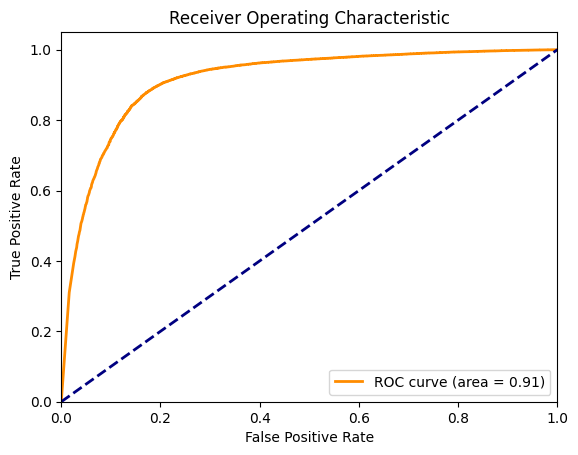

In [ ]:
labels, probs = validate(model, validation_loader, loss_func)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(labels, probs)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Save the entire model
torch.save(model, '/content/drive/MyDrive/drug+review+dataset+drugs+com/LSTM.pth')

# Load the entire model
loaded_model = torch.load('/content/drive/MyDrive/drug+review+dataset+drugs+com/LSTM.pth')
loaded_model.eval()  # Set the model to evaluation mode


In [ ]:
# loaded_model.